In [1]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Data
income_df = pd.read_csv("../data/curated/vic_income_by_sa2.csv")

# drop irrelevant columns
income_df = income_df.drop(columns=['Unnamed: 0'])

In [3]:
income_df.loc[income_df['Earners_2019'] == 'np']

,SA2,SA2_NAME,Earners_2015,Earners_2016,Earners_2017,Earners_2018,Earners_2019,Median_Age_2015,Median_Age_2016,Median_Age_2017,...,Median_$_2015,Median_$_2016,Median_$_2017,Median_$_2018,Median_$_2019,Mean_$_2015,Mean_$_2016,Mean_$_2017,Mean_$_2018,Mean_$_2019
82,205021083,Lake King,np,np,np,np,np,np,np,np,...,np,np,np,np,np,np,np,np,np,np


In [4]:
income_df = income_df.replace(['np'],'0')

#convert data types
convert_dic = {'Earners_2015': int, 
            'Earners_2016': int, 
            'Earners_2017': int, 
            'Earners_2018': int, 
            'Earners_2019': int,
            'Median_Age_2015': int,
            'Median_Age_2016': int,
            'Median_Age_2017': int,
            'Median_Age_2018': int,
            'Median_Age_2019': int, 
            'Mean_$_2015': int, 
            'Mean_$_2016': int, 
            'Mean_$_2017': int, 
            'Mean_$_2018': int, 
            'Mean_$_2019': int }

income_df = income_df.astype(convert_dic)

In [5]:
income_df

,SA2,SA2_NAME,Earners_2015,Earners_2016,Earners_2017,Earners_2018,Earners_2019,Median_Age_2015,Median_Age_2016,Median_Age_2017,...,Median_$_2015,Median_$_2016,Median_$_2017,Median_$_2018,Median_$_2019,Mean_$_2015,Mean_$_2016,Mean_$_2017,Mean_$_2018,Mean_$_2019
0,201011001,Alfredton,6225,6718,7124,7558,7989,42,42,42,...,48532,49385,50845,52448,53932,56374,57747,60026,62315,63668
1,201011002,Ballarat,7289,7400,7470,7585,7595,45,46,47,...,47894,49564,50413,51736,53688,67217,72754,71895,74671,77876
2,201011003,Ballarat - North,12503,12516,12889,13356,13598,43,43,43,...,44494,45816,46561,49211,50593,53017,54660,56067,59786,60367
3,201011004,Ballarat - South,11347,11529,11905,12294,12722,40,39,40,...,40846,41544,42531,44293,45828,45473,46143,47676,49041,50778
4,201011005,Buninyong,3966,4001,4118,4195,4249,45,45,45,...,46972,47511,49179,51034,52377,58011,58292,60009,61565,63258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,2225,2212,2315,2297,2360,52,52,51,...,31322,33020,32563,33929,36219,40640,42426,44236,44755,46448
458,217041477,Moyne - East,3890,3833,3879,3954,4081,46,46,46,...,40775,40053,41244,44000,46071,48627,47031,49104,50652,55573
459,217041478,Moyne - West,5650,5602,5759,5765,5852,47,47,48,...,39961,41751,42159,43136,45256,48280,50307,51459,52080,55547
460,217041479,Warrnambool - North,12185,12346,12694,12950,13157,43,43,43,...,42635,43536,44772,46945,48855,50513,50939,52090,59812,56099


In [6]:
yr_income = income_df[['SA2', 'SA2_NAME', 'Mean_$_2015', 'Mean_$_2016', 'Mean_$_2017', 'Mean_$_2018', 'Mean_$_2019']]
yr_income.rename(columns={'Mean_$_2015': '2015', 'Mean_$_2016': '2016', 'Mean_$_2017': '2017', 'Mean_$_2018': '2018', 
    'Mean_$_2019': '2019'}, inplace=True)
yr_income.head()

/var/folders/k8/b845kf0j0lv6z98ckndc9wc80000gn/T/ipykernel_3789/617848335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_income.rename(columns={'Mean_$_2015': '2015', 'Mean_$_2016': '2016', 'Mean_$_2017': '2017', 'Mean_$_2018': '2018',


,SA2,SA2_NAME,2015,2016,2017,2018,2019
0,201011001,Alfredton,56374,57747,60026,62315,63668
1,201011002,Ballarat,67217,72754,71895,74671,77876
2,201011003,Ballarat - North,53017,54660,56067,59786,60367
3,201011004,Ballarat - South,45473,46143,47676,49041,50778
4,201011005,Buninyong,58011,58292,60009,61565,63258


In [12]:
yr_income = pd.melt(yr_income, id_vars=["SA2", "SA2_NAME"], 
                  var_name="Year", value_name="Income")
yr_income = yr_income.sort_values(by = ['SA2_NAME', 'Year']).reset_index(drop=True)
yr_income.head()

,SA2,SA2_NAME,Year,Income
0,206071139,Abbotsford,2015,65878
1,206071139,Abbotsford,2016,69588
2,206071139,Abbotsford,2017,72002
3,206071139,Abbotsford,2018,75384
4,206071139,Abbotsford,2019,78181


In [13]:
df = yr_income.set_index(['SA2', 'SA2_NAME'])

In [14]:
df

Year  Income
SA2       SA2_NAME                
206071139 Abbotsford  2015   65878
          Abbotsford  2016   69588
          Abbotsford  2017   72002
          Abbotsford  2018   75384
          Abbotsford  2019   78181
...                    ...     ...
204011062 Yea         2015   44052
          Yea         2016   44684
          Yea         2017   45806
          Yea         2018   47070
          Yea         2019   49593

[2310 rows x 2 columns]

In [15]:
pivot1 = yr_income.pivot(index='Year', columns = 'SA2_NAME', values = 'Income')
pivot1

SA2_NAME,Abbotsford,Airport West,Albert Park,Alexandra,Alfredton,Alphington - Fairfield,Alps - East,Alps - West,Altona,Altona Meadows,...,Wyndham Vale,Yackandandah,Yallourn North - Glengarry,Yarra - North,Yarra Valley,Yarram,Yarraville,Yarrawonga,Yarriambiack,Yea
Year,,,,,,,,,,,,,,,,,,,,,
2015,65878,56238,111338,41922,56374,72015,0,26421,60523,52065,...,52420,52287,62368,83429,46264,54112,70906,46270,40333,44052
2016,69588,58809,115049,44044,57747,75345,0,21788,63487,53879,...,52906,52727,62311,85217,47804,45827,73604,46072,38594,44684
2017,72002,60758,115981,45642,60026,76516,23098,30856,65344,55384,...,54340,54067,62655,87736,49383,44023,76250,47691,50845,45806
2018,75384,63576,117352,46205,62315,79356,22659,27804,69301,57686,...,56229,54936,62653,94560,51519,45840,79585,48313,58228,47070
2019,78181,65204,120412,48414,63668,84148,23162,33603,71989,58832,...,58036,57183,64814,99558,53041,48524,83130,49703,52472,49593


In [16]:
list(pivot1.columns)

['Abbotsford',
 'Airport West',
 'Albert Park',
 'Alexandra',
 'Alfredton',
 'Alphington - Fairfield',
 'Alps - East',
 'Alps - West',
 'Altona',
 'Altona Meadows',
 'Altona North',
 'Ararat',
 'Ararat Region',
 'Ardeer - Albion',
 'Armadale',
 'Ascot Vale',
 'Ashburton (Vicnp)',
 'Ashwood - Chadstone',
 'Aspendale Gardens - Waterways',
 'Avoca',
 'Bacchus Marsh',
 'Bacchus Marsh Region',
 'Bairnsdale',
 'Ballarat',
 'Ballarat - North',
 'Ballarat - South',
 'Balwyn',
 'Balwyn North',
 'Bannockburn',
 'Bayswater',
 'Bayswater North',
 'Beaconsfield - Officer',
 'Beaufort',
 'Beaumaris',
 'Beechworth',
 'Belgrave - Selby',
 'Belmont',
 'Benalla',
 'Benalla Region',
 'Bendigo',
 'Bendigo Region - North',
 'Bendigo Region - South',
 'Bentleigh - McKinnon',
 'Bentleigh East (North)',
 'Bentleigh East (South)',
 'Berwick - North',
 'Berwick - South',
 'Blackburn',
 'Blackburn South',
 'Boronia',
 'Box Hill',
 'Box Hill North',
 'Braeside',
 'Braybrook',
 'Bright - Mount Beauty',
 'Brighton 

<AxesSubplot:title={'center':'Income Per Year by SA2 in Victoria'}, xlabel='Year', ylabel='Income'>

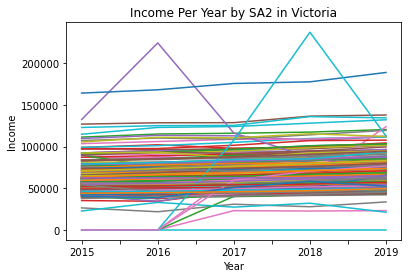

In [17]:
pivot1.plot(legend = False, title = 'Income Per Year by SA2 in Victoria', xlabel = 'Year', ylabel = 'Income')

In [18]:
yr_sa2_income = yr_income.pivot(index = 'SA2_NAME', columns = 'Year', values = 'Income')
yr_sa2_income

Year,2015,2016,2017,2018,2019
SA2_NAME,,,,,
Abbotsford,65878,69588,72002,75384,78181
Airport West,56238,58809,60758,63576,65204
Albert Park,111338,115049,115981,117352,120412
Alexandra,41922,44044,45642,46205,48414
Alfredton,56374,57747,60026,62315,63668
...,...,...,...,...,...
Yarram,54112,45827,44023,45840,48524
Yarraville,70906,73604,76250,79585,83130
Yarrawonga,46270,46072,47691,48313,49703


In [19]:
# mean_growth = pd.DataFrame()
yr_sa2_income['Rate_Change_Yr'] = ((yr_sa2_income['2016'] - yr_sa2_income['2015'])/yr_sa2_income['2015'] + 
                    (yr_sa2_income['2017'] - yr_sa2_income['2016'])/yr_sa2_income['2016'] +
                    (yr_sa2_income['2018'] - yr_sa2_income['2017'])/yr_sa2_income['2017'] +
                    (yr_sa2_income['2019'] - yr_sa2_income['2018'])/yr_sa2_income['2018'])/4
yr_sa2_income['Rate_Change_Yr']

SA2_NAME
Abbotsford      0.043770
Airport West    0.037711
Albert Park     0.019832
Alexandra       0.036761
Alfredton       0.030917
                  ...   
Yarram         -0.023162
Yarraville      0.040570
Yarrawonga      0.018169
Yarriambiack    0.080167
Yea             0.030163
Name: Rate_Change_Yr, Length: 462, dtype: float64

In [20]:
yr_sa2_income

Year,2015,2016,2017,2018,2019,Rate_Change_Yr
SA2_NAME,,,,,,
Abbotsford,65878,69588,72002,75384,78181,0.043770
Airport West,56238,58809,60758,63576,65204,0.037711
Albert Park,111338,115049,115981,117352,120412,0.019832
Alexandra,41922,44044,45642,46205,48414,0.036761
Alfredton,56374,57747,60026,62315,63668,0.030917
...,...,...,...,...,...,...
Yarram,54112,45827,44023,45840,48524,-0.023162
Yarraville,70906,73604,76250,79585,83130,0.040570
Yarrawonga,46270,46072,47691,48313,49703,0.018169


In [57]:
forecast_income = pd.DataFrame()
forecast_income['SA2_NAME'] = income_df['SA2_NAME']
years = ['2020']

for year in years:
    predict_income = []
    name = 'Alps - East'
    if yr_sa2_income.loc[name, 'Rate_Change_Yr'] >= 0:
        predict_income.append(
            yr_sa2_income.loc[name, str(int(year) - 1)] + (yr_sa2_income.loc[name, str(int(year) - 1)] * yr_sa2_income.loc[name, 'Rate_Change_Yr'])
        )
    else:
        predict_income.append(
            yr_sa2_income.loc[str(name), str(int(year) - 1)] + (yr_sa2_income.loc[str(name), str(int(year) - 1)]*yr_sa2_income['Rate_Change_Yr'].mean())
        )

In [58]:
predict_income

[23813.63483797073]

In [26]:
forecast_income = pd.DataFrame()
forecast_income['SA2_NAME'] = yr_income['SA2_NAME'].unique()
years = ['2020' , '2021', '2022', '2023', '2024', '2025']

for year in years:
    predict_income = []
    for name in yr_income['SA2_NAME'].unique():
        if yr_sa2_income.loc[str(name), 'Rate_Change_Yr'] >= 0:
            predict_income.append(
                yr_sa2_income.loc[str(name), str(int(year) - 1)] + (yr_sa2_income.loc[str(name), str(int(year) - 1)]*yr_sa2_income.loc[str(name), 'Rate_Change_Yr'])
            )
        else:
            predict_income.append(
                yr_sa2_income.loc[str(name), str(int(year) - 1)] + (yr_sa2_income.loc[str(name), str(int(year) - 1)]*yr_sa2_income['Rate_Change_Yr'].mean())
            )
    forecast_income[year] = predict_income
    yr_sa2_income[year] = predict_income


In [27]:
forecast_income

,SA2_NAME,2020,2021,2022,2023,2024,2025
0,Abbotsford,81602.990023,85174.760884,88902.868505,92794.155762,96855.765042,101095.151359
1,Airport West,67662.932108,70214.593913,72862.482378,75610.226342,78461.591492,81420.485526
2,Albert Park,122800.014792,125235.388774,127719.061173,130251.989846,132835.151645,135469.542794
3,Alexandra,50193.741276,52038.907408,53951.903472,55935.222957,57991.451012,60123.267821
4,Alfredton,65636.394852,67665.645679,69757.633940,71914.299259,74137.641227,76429.721256
...,...,...,...,...,...,...,...
457,Yarram,49889.164013,51292.735264,52735.794293,54219.452042,55744.850705,57313.164614
458,Yarraville,86502.600403,90012.027865,93663.833488,97463.793581,101417.918800,105532.463655
459,Yarrawonga,50606.034375,51525.475628,52461.621851,53414.776547,54385.248739,55373.353061
460,Yarriambiack,56678.548213,61222.324812,66130.364549,71431.869482,77158.382725,83343.976127


In [28]:
years = ['2020' , '2021', '2022', '2023', '2024', '2025']
for year in years:
    forecast_income[year] = forecast_income[year].round(1)

In [30]:
forecast_income.to_csv('../../generic-real-estate-consulting-project-18/data/curated/forecast_income_SA2.csv')

In [162]:
forecast_income = pd.DataFrame()
forecast_income['SA2_NAME'] = income_df['SA2_NAME']
years = ['2020'] #, '2021', '2022', '2023', '2024', '2025']

for year in years:
    predict_income = []
    prev_inc = yr_sa2_income.loc[['Abbotsford'], str(int(year) - 1)]
    rate = yr_sa2_income.loc['Abbotsford', 'Rate_Change_Yr']
    predict_income.append(
        prev_inc + (prev_inc * yr_sa2_income.loc['Abbotsford', 'Rate_Change_Yr'])
    )
    forecast_income[year] = predict_income

IndexingError: Too many indexers

In [29]:
yr_sa2_income.loc[('Abbotsford', 'Rate_Change_Yr')]

0.04377009788452698

In [122]:
for name in yr_income['SA2_NAME'].unique():
    print((yr_sa2_income.loc[str(name), 'Rate_Change_Yr']))

0.04377009788452698
0.0377113690632649
0.019832033289846188
0.036760880648117736
0.030916549154929508
0.03982118393039116
nan
0.08762387560028528
0.04439173980077145
0.03105113692455476
0.04975517551424896
0.0354186732530082
0.07739067852067208
0.031059376030052762
0.005015679968364325
0.03125872222565069
0.03535524732190156
0.026858437381932512
0.026178659536564734
0.03953562547294576
0.027477135189376483
0.0358417160357849
0.01729098942177855
0.03802539103542283
0.03319508788701979
0.028001731490258815
0.0035878456787742322
0.02247026091748019
0.03662890873113274
0.025983381073814753
0.02705560094594072
0.019892333939195803
0.04773455791572408
0.021890379405265253
0.017831524395599367
0.03270368404454368
0.03071814974318015
0.02796884322045519
0.024168750595420167
0.033244332078874055
0.023556325174035636
0.028463886941081713
0.027743314292190166
0.030257105980098373
0.04124061319636534
0.02465081445752445
0.027066340280100885
0.02814557744681863
0.02251065017606272
0.031119491636252

In [121]:
for name in yr_income['SA2_NAME'].unique():
    print((yr_sa2_income.loc[str(name), '2019']) + 
        ((yr_sa2_income.loc[str(name), '2019'])*(yr_sa2_income.loc[str(name), 'Rate_Change_Yr'])))
    

81602.9900227102
67662.93210840113
122800.01479249696
50193.741275697976
65636.39485159605
87498.87298537456
nan
36547.42509179639
75184.71695651773
60658.800487545406
68656.08798898291
54131.688237667266
65134.73086064575
51633.391432832985
112188.89533918854
83201.9537091655
99631.20009453926
66074.23301177783
69051.56200021545
48166.88320628894
65026.97293186526
63771.5952477431
51497.304466509275
80837.26535227458
62370.88787047572
52199.871921612365
88814.51357903448
84497.96483248148
66933.05537895177
56588.113383126256
61266.9477632282
65850.36843311811
52213.85169373011
97161.33727385262
52785.76068668018
67912.65967013728
57999.54100419849
51751.03547424737
47235.686946211375
61813.84216661864
55266.923777772055
62342.39543470755
79498.0008471295
73008.13955817369
73869.77406260294
69168.02857914074
64650.74492161151
73179.28962035476
66077.7057463277
58714.00609275148
55406.97662973363
67895.2484524442
78243.65517887425
54379.970537020374
49719.973967312166
140774.93567599833

In [129]:
yr_income['SA2_NAME'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alexandra',
       'Alfredton', 'Alphington - Fairfield', 'Alps - East',
       'Alps - West', 'Altona', 'Altona Meadows', 'Altona North',
       'Ararat', 'Ararat Region', 'Ardeer - Albion', 'Armadale',
       'Ascot Vale', 'Ashburton (Vicnp)', 'Ashwood - Chadstone',
       'Aspendale Gardens - Waterways', 'Avoca', 'Bacchus Marsh',
       'Bacchus Marsh Region', 'Bairnsdale', 'Ballarat',
       'Ballarat - North', 'Ballarat - South', 'Balwyn', 'Balwyn North',
       'Bannockburn', 'Bayswater', 'Bayswater North',
       'Beaconsfield - Officer', 'Beaufort', 'Beaumaris', 'Beechworth',
       'Belgrave - Selby', 'Belmont', 'Benalla', 'Benalla Region',
       'Bendigo', 'Bendigo Region - North', 'Bendigo Region - South',
       'Bentleigh - McKinnon', 'Bentleigh East (North)',
       'Bentleigh East (South)', 'Berwick - North', 'Berwick - South',
       'Blackburn', 'Blackburn South', 'Boronia', 'Box Hill',
       'Box Hill North', 'Bra

In [76]:
pivot2.iloc[0,:]

Year
2015    65878
2016    69588
2017    72002
2018    75384
2019    78181
Name: Abbotsford, dtype: int64

In [29]:
forecast_income


,SA2_NAME,2020,2021,2022,2023,2024,2025
0,Abbotsford,81603.0,85174.8,88902.9,92794.2,96855.8,101095.2
1,Airport West,67662.9,70214.6,72862.5,75610.2,78461.6,81420.5
2,Albert Park,122800.0,125235.4,127719.1,130252.0,132835.2,135469.5
3,Alexandra,50193.7,52038.9,53951.9,55935.2,57991.5,60123.3
4,Alfredton,65636.4,67665.6,69757.6,71914.3,74137.6,76429.7
...,...,...,...,...,...,...,...
457,Yarram,49889.2,51292.7,52735.8,54219.5,55744.9,57313.2
458,Yarraville,86502.6,90012.0,93663.8,97463.8,101417.9,105532.5
459,Yarrawonga,50606.0,51525.5,52461.6,53414.8,54385.2,55373.4
460,Yarriambiack,56678.5,61222.3,66130.4,71431.9,77158.4,83344.0
